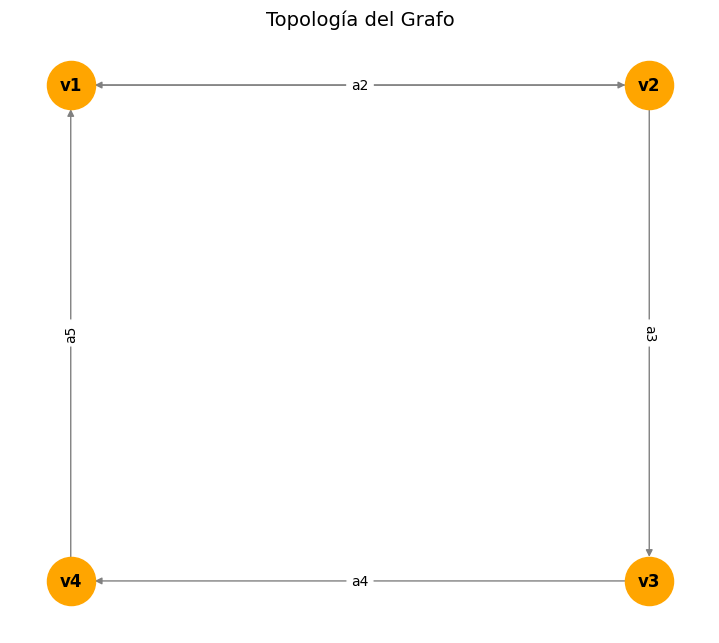

Matriz de Adyacencia A:
[[0 1 0 0]
 [1 0 1 0]
 [0 0 0 1]
 [1 0 0 0]]

Grado de salida:
v1: 1
v2: 2
v3: 1
v4: 1

Grado de entrada:
v1: 2
v2: 1
v3: 1
v4: 1

Matriz de Alcance (R):
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]

Matriz de Distancias (camino más corto):
0	1	2	3	
1	0	1	2	
2	3	0	1	
1	2	3	0	


In [ ]:
import networkx as nx #Creacion y manipulacion de los grafos
import matplotlib.pyplot as plt #dibuja el grafo
import numpy as np #trabaja con las matrices (para imprimir matrices de forma clara)

# Crear grafo dirigido
G = nx.DiGraph() #crea un grafo dirigido, es decir, las aristas tienen direccion (flechas )

# Definir los nodos y agregarlos al grafo
nodos = ['v1', 'v2', 'v3', 'v4'] #aqui se definen los 4 nodos al grafo
G.add_nodes_from(nodos)

# Aristas con etiquetas (etiqueta, origen, destino)
aristas = [         #se definen las aristas y cada tupla representa una arista: (etiqueta, origen, destino)
    ('a1', 'v1', 'v2'),
    ('a2', 'v2', 'v1'),
    ('a3', 'v2', 'v3'),
    ('a4', 'v3', 'v4'),
    ('a5', 'v4', 'v1'),
]

# Agregar aristas al grafo con etiquetas
for etiqueta, origen, destino in aristas:
    G.add_edge(origen, destino, label=etiqueta)
    #en este bucle recorre la lista de aristas y las añade al grafo, asociando cada una con una etiqueta (label)
# Se definen las posiciones fijas para los nodos
pos = {
    'v1': (0, 1),
    'v2': (1, 1),
    'v3': (1, 0),
    'v4': (0, 0),
}

# Dibujar grafo
plt.figure(figsize=(7, 6))
nx.draw(G, pos, with_labels=True, node_color='orange', node_size=1200,
        edge_color='gray', arrows=True, font_weight='bold')
etiquetas = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=etiquetas, font_size=10)
plt.title("Topología del Grafo", fontsize=14)
plt.axis('off')
plt.show()

# Matriz de adyacencia
A = nx.adjacency_matrix(G, nodelist=nodos).todense()
print("Matriz de Adyacencia A:")
print(np.array(A))
  #la matriz de adyacencia muestra si hay conexion de un nodo a otro (1 si hay, 0 si no)

# Grado de entrada y salida
print("\nGrado de salida:")
for nodo in nodos:
    print(f"{nodo}: {G.out_degree(nodo)}") #cuántas aristas salen del nodo

print("\nGrado de entrada:")
for nodo in nodos:
    print(f"{nodo}: {G.in_degree(nodo)}") #cuántas aristas entran al nodo

# Matriz de alcance (clausura transitiva)
R = nx.adjacency_matrix(nx.transitive_closure(G), nodelist=nodos).todense()
print("\nMatriz de Alcance (R):")
print(np.array(R))
  #en esta funcion da la clausura transitiva indica si es posible llegar de un nodo a otro (directa o indirectamente
# Matriz de distancias más cortas
print("\nMatriz de Distancias (camino más corto):")
dij = dict(nx.all_pairs_shortest_path_length(G))
for i in nodos:
    for j in nodos:
        print(f"{dij[i].get(j, '∞')}", end='\t')
    print()
#calcula la distancia mínima (en número de aristas) entre todos los pares de nodos.